In [3]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions

from Bio.PDB.PDBParser import PDBParser
sys.path.insert(0, '/Users/weilu/Research/opt_server/')
from pyCodeLib import *
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

## one detailed 20 aa types.
## the i+4 one could use a simplied code.

In [ ]:
data_anti = pd.read_csv("/Users/weilu/Research/server/jun_week4_2020/alpha_helical_membrane_protein/info_interaction_anti_parallel.csv", index_col=0)
data_para = pd.read_csv("/Users/weilu/Research/server/jun_week4_2020/alpha_helical_membrane_protein/info_interaction_parallel.csv", index_col=0)
a = data_anti.query("rij < 6.5 and rij_2 < 6.5").reset_index()
b = data_para.query("rij < 6.5 and rij_2 < 6.5").reset_index()
c = pd.concat([a.assign(Direction="anti"),b.assign(Direction="parallel")]).reset_index(drop=True)
c.to_csv("/Users/weilu/Research/database/info_interaction_cutoff65_complete.csv")

In [46]:
# data = pd.read_csv("/Users/weilu/Research/server/jun_week4_2020/alpha_helical_membrane_protein/info_interaction.csv", index_col=0)
# data_cutoff = data.query("rij < 6.5 and rij_2 < 6.5").reset_index()
# data_cutoff.to_csv("/Users/weilu/Research/database/info_interaction_cutoff65.csv")
# data = pd.read_csv("/Users/weilu/Research/database/info_interaction_cutoff65.csv", index_col=0)

In [47]:
# data = pd.read_csv("/Users/weilu/Research/server/jun_week4_2020/alpha_helical_membrane_protein/info_interaction.csv", index_col=0)
# data_cutoff = data.query("rij < 7.5 and rij_2 < 7.5").reset_index()
# data_cutoff["Res1_2_index"] = data_cutoff["Res1_2"].apply(lambda x: six_letter_code_letters[three_to_one(x)])
# data_cutoff["Res2_2_index"] = data_cutoff["Res2_2"].apply(lambda x: six_letter_code_letters[three_to_one(x)])
# data_cutoff.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index().sort_values("Protein")

In [43]:
# (G)(CAST)(P)(IMLV)(NHQEDRK)(FYW)
six_letter_code_letters = {
    'I':3,
    'M':3,
    'L':3,
    'V':3,
    'F':5,
    'Y':5,
    'W':5,
    'G':0,
    'P':2,
    'C':1,
    'A':1,
    'S':1,
    'T':1,
    'N':4,
    'H':4,
    'Q':4,
    'E':4,
    'D':4,
    'R':4,
    'K':4
}

In [2]:
data = pd.read_csv("/Users/weilu/Research/database/info_interaction_cutoff65_complete.csv", index_col=0)

In [10]:
six_letter_code_combinations_index = list(range(126))
six_letter_code_combinations = ['000004', '000013', '000022', '000031', '000040', '000103', '000112', '000121', '000130', '000202', '000211', '000220', '000301', '000310', '000400', '001003', '001012', '001021', '001030', '001102', '001111', '001120', '001201', '001210', '001300', '002002', '002011', '002020', '002101', '002110', '002200', '003001', '003010', '003100', '004000', '010003', '010012', '010021', '010030', '010102', '010111', '010120', '010201', '010210', '010300', '011002', '011011', '011020', '011101', '011110', '011200', '012001', '012010', '012100', '013000', '020002', '020011', '020020', '020101', '020110', '020200', '021001', '021010', '021100', '022000', '030001', '030010', '030100', '031000', '040000', '100003', '100012', '100021', '100030', '100102', '100111', '100120', '100201', '100210', '100300', '101002', '101011', '101020', '101101', '101110', '101200', '102001', '102010', '102100', '103000', '110002', '110011', '110020', '110101', '110110', '110200', '111001', '111010', '111100', '112000', '120001', '120010', '120100', '121000', '130000', '200002', '200011', '200020', '200101', '200110', '200200', '201001', '201010', '201100', '202000', '210001', '210010', '210100', '211000', '220000', '300001', '300010', '300100', '301000', '310000', '400000']
six_letter_code_combinations_map = dict(list(zip(six_letter_code_combinations, six_letter_code_combinations_index)))
inverse_six_letter_code_combinations_map = dict(list(zip(six_letter_code_combinations_index, six_letter_code_combinations)))


In [319]:
from scipy.special import comb

In [320]:
comb(9, 4)

126.0

In [321]:
comb(12, 4)

495.0

In [322]:
comb(20, 4)

4845.0

In [14]:
calculate_six_letter_index(["A", "A", "A", "A"])

(69, '040000')

In [17]:
def convert_to_index(data):
    
    index, code = calculate_six_letter_index([three_to_one(data["Res1_1"]), three_to_one(data["Res1_2"]), three_to_one(data["Res2_1"]), three_to_one(data["Res2_2"])])
    data["interaction_index"] = index
    data["code"] = code
    return data

In [19]:
# data = data.apply(convert_to_index, axis=1)
# data.to_csv("/Users/weilu/Research/database/para_anti_para_with_six_letter_code.csv")

In [22]:
data = pd.read_csv("/Users/weilu/Research/database/para_anti_para_with_six_letter_code.csv", index_col=0)
similar_size_protein_list = data["Protein"].value_counts().reset_index().query("Protein > 50 and Protein < 400")["index"].to_list()
data_selected = data.query("Protein in @similar_size_protein_list").reset_index(drop=True)


In [26]:
len(similar_size_protein_list)

3252

In [25]:
data.shape

(746520, 19)

## using Nick's definition, 126 parameters.

In [32]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/first_1600_phi_gxxxg_v2_well126_A"
a = np.loadtxt(fileLocation)


In [35]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/last_1600_phi_gxxxg_v2_well126_A"
a_last = np.loadtxt(fileLocation)



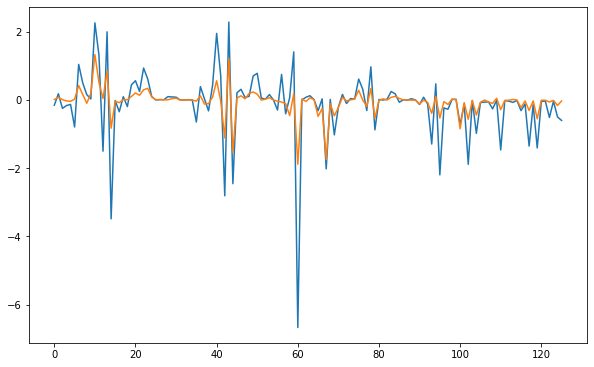

In [36]:
plt.plot(a)
plt.plot(a_last)

In [101]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/first_1600_phi_gxxxg_v2_well126_gamma"
gamma = np.loadtxt(fileLocation)
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/last_1600_phi_gxxxg_v2_well126_gamma"
gamma_last = np.loadtxt(fileLocation)


(-10, 5)

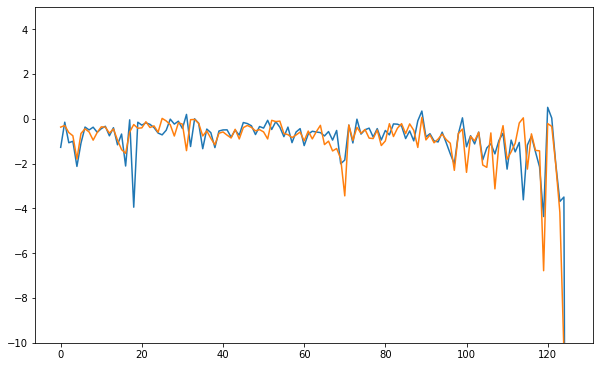

In [104]:
plt.plot(gamma)
plt.plot(gamma_last)
plt.ylim([-10,5])

In [326]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
gamma = np.loadtxt(fileLocation)
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/first_1600_phi_gxxxg_v2_well126_gamma"
gamma2 = np.loadtxt(fileLocation)


(-10, 5)

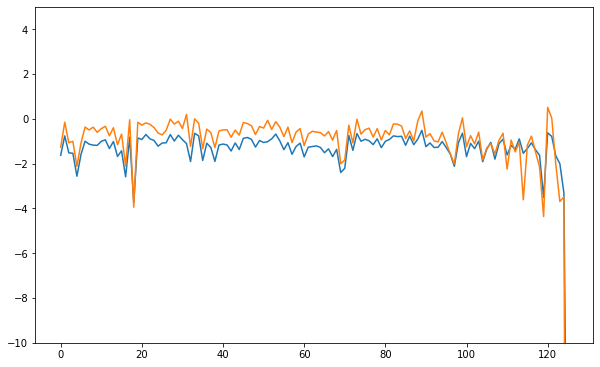

In [327]:
plt.plot(gamma)
plt.plot(gamma2)
plt.ylim([-10,5])

In [48]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/saved_gammas/first_1600_cutoff100_impose_Aprime_constraint"
gamma = np.loadtxt(fileLocation)
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/saved_gammas/last_1600_cutoff100_impose_Aprime_constraint"
gamma_last = np.loadtxt(fileLocation)



In [99]:
a = [1,2,3]
random.shuffle(a)
a

[3, 1, 2]

In [108]:
def get_interaction_index_from_four_residues_v2(res1_1, res1_2, res2_1, res2_2):
    interaction_index, code = calculate_six_letter_index([three_to_one(res1_1), three_to_one(res1_2), three_to_one(res2_1), three_to_one(res2_2)])
    return interaction_index

In [ ]:
compute_gxxxg_energy(model, gamma)

In [125]:
a = list(structure.get_residues())[0]

In [126]:
a.id[0] == "H_NGP"

('H_NGP', 1, ' ')

In [133]:
def is_hetero(residue):
    if residue.id[0] in [' ', "H_NGP", "H_IPR", "H_IGL"]:
        return False
    else:
        print(residue)
        return True

In [138]:
def get_res_list(structure, tm_only=False):

    res_list = Selection.unfold_entities(structure, 'R')

    # Get all residues from a structure
    res_list = [residue for residue in res_list if not is_hetero(residue)]


    return res_list

def get_neighbor_list(structure, tm_only=False):

    res_list = get_res_list(structure)
    atom_list = [a for a in get_atom_list(
        structure) if not is_hetero(a.get_parent())]

    # print(atom_list)
    neighbor_list = NeighborSearch(atom_list)
    return neighbor_list

In [149]:
sequence

'TPFVKISIHEVVKTLVEAIILVFLVMYLFLQNFRATLIPTIAVPVVLLGTFAVLAAFGFSINTLTMFGMVLAIGLLVDDAIVVVENVERVMAEEGLPPKEATRKSMGQIQGALVGIAMVLSAVFVPMAFFGGSTGAIYRQFSITIVSAMALSVLVALILTPALCATML'

In [153]:
pre = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/1iwg"
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/1iwg/native"
structure = parse_pdb(pdb)
sequence = read_fasta(f"{pre}/crystal_structure.fasta")

all_models = list(structure.get_models())
model = all_models[0]
structure = model

## if not using CBD model. then the CB position is wrong.
## start from CBD model. then the native will be correct.

In [170]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/run1/1iwg/movie"
structure = parse_pdb(pdb)

In [173]:
e_list = []
for i, model in enumerate(structure.get_models()):
    e_list.append(compute_gxxxg_energy(model, gamma, sequence=sequence))
    # print(i, compute_gxxxg_energy(model, gamma, sequence=sequence))

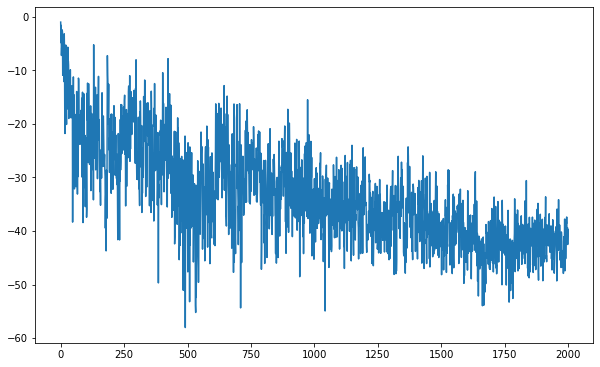

In [174]:
plt.plot(e_list)

In [179]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/test_cbd/movie"
structure = parse_pdb(pdb)

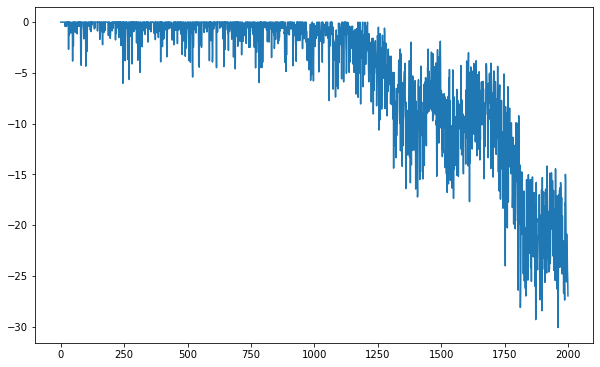

In [180]:
e_list = []
for i, model in enumerate(structure.get_models()):
    e_list.append(compute_gxxxg_energy(model, gamma, sequence=sequence))
    # print(i, compute_gxxxg_energy(model, gamma, sequence=sequence))
plt.plot(e_list)

In [177]:
e_list

[-55.188179066464905, -53.20638681799191]

In [308]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_gamma"
gammaFull = np.loadtxt(fileLocation)

In [318]:
np.savetxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg.dat", -gammaFull, fmt="%.3f")

In [313]:
np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/gxxxg.dat")

array([-1.0060e+00, -1.9600e-01, -9.3100e-01, -9.4400e-01, -2.0890e+00,
       -9.6500e-01, -3.8400e-01, -5.1800e-01, -5.4200e-01, -5.9900e-01,
       -4.1100e-01, -3.4300e-01, -7.2400e-01, -4.0500e-01, -1.1040e+00,
       -8.7600e-01, -1.9370e+00, -1.9300e-01, -2.8850e+00, -2.2700e-01,
       -3.1500e-01, -1.5100e-01, -2.8100e-01, -3.6900e-01, -6.2200e-01,
       -5.0500e-01, -3.5600e-01, -2.0200e-01, -3.6700e-01, -1.3300e-01,
       -3.5700e-01, -3.7900e-01, -9.7000e-01, -2.5000e-02, -3.7600e-01,
       -1.1580e+00, -4.8000e-01, -6.9300e-01, -1.2640e+00, -5.7100e-01,
       -5.2000e-01, -5.5900e-01, -8.2600e-01, -4.8700e-01, -7.7300e-01,
       -2.4400e-01, -2.5000e-01, -3.4000e-01, -6.5200e-01, -3.8600e-01,
       -4.6400e-01, -3.2100e-01, -3.4700e-01, -1.1900e-01, -1.9200e-01,
       -7.5900e-01, -4.7100e-01, -1.0020e+00, -6.2400e-01, -4.8200e-01,
       -1.1290e+00, -6.5300e-01, -6.3900e-01, -5.8400e-01, -5.1900e-01,
       -8.8900e-01, -6.9700e-01, -1.0890e+00, -7.6900e-01, -1.91

In [9]:
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/gammas_aa_to_gly_using_ca_position/first_1500_phi_gxxxg_v2_well126_gamma"
gamma = np.loadtxt(fileLocation)
fileLocation = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/gammas_aa_to_gly_using_ca_position/last_1500_phi_gxxxg_v2_well126_gamma"
gamma_last = np.loadtxt(fileLocation)




In [10]:
max(gamma)

0.46718

In [14]:
plt.rcParams['figure.figsize'] = 0.5*np.array((10,6.180))    #golden ratio

(-10, 5)

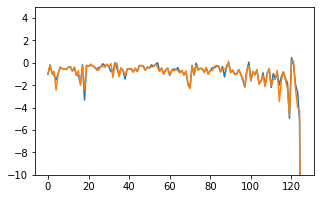

In [15]:
plt.plot(gamma)
plt.plot(gamma_last)
# plt.plot(gammaFull)
plt.ylim([-10,5])

In [202]:
def plot_list(list_to_plot, text_labels=None, fontsize=20, labelsize=12, aspect=1, labelrotation='horizontal'):
	x = list(range(len(list_to_plot)))
	y = np.array(list_to_plot)
	f = plt.figure()
	ax = f.add_subplot(111, aspect=aspect)
	ax.tick_params(labelsize=labelsize)
	plt.plot(x, y)
    
	if not text_labels == None:
		# #set the bbox for the text. Increase txt_width for wider text.
		# txt_height = 0.04*(plt.ylim()[1] - plt.ylim()[0])
		# txt_width = 0.02*(plt.xlim()[1] - plt.xlim()[0])
		# #Get the corrected text positions, then write the text.
		# text_positions = get_text_positions(text_labels, x, y, txt_width, txt_height)
		# text_plotter(text_labels, x, y, text_positions, txt_width, txt_height)

		# plt.ylim(0,max(text_positions)+2*txt_height)
		for i, txt in enumerate(text_labels):
			ax.annotate(txt, (x[i], y[i]), fontsize=fontsize, rotation=labelrotation)
	plt.show()

In [213]:
gamma[-1] = -10
b = gamma

In [214]:
gammas = sorted(gamma)
labels = [label for (gamma,label) in sorted(zip(b,six_letter_code_combinations))]

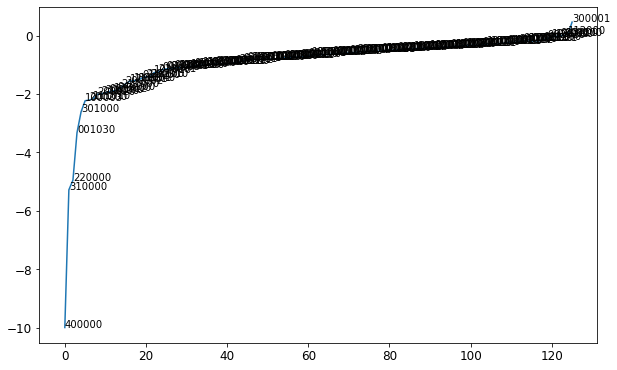

In [222]:
plot_list(gammas, text_labels=labels, fontsize=10, aspect='auto', labelrotation='horizontal')
# plt.ylim([-10,10])

In [255]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
g_all_1 = np.ones(126)
compute_gxxxg_energy_test(structure[0], g_all_1, sequence=sequence, direction=[4])

20.560673775163753

In [256]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
g_all_1 = np.ones(126)
compute_gxxxg_energy_test(structure[0], g_all_1, sequence=sequence)

68.0379128264744

In [306]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
g_all_1 = np.ones(126)
compute_gxxxg_energy_test(structure[0], g_all_1, sequence=sequence, direction=[-4])

47.47723905131064

In [298]:
11943.00*2

23886.0

In [315]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
compute_gxxxg_energy_test(structure[0], gammaFull, sequence=sequence, direction=[4])

-18.09095732845034

In [317]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
compute_gxxxg_energy_test(structure[0], gammaFull, sequence=sequence, direction=[-4])

-38.27151058375141

In [316]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/quick_check/native"
structure = parse_pdb(pdb)
compute_gxxxg_energy_test(structure[0], gammaFull, sequence=sequence, direction=[-4, 4])

-56.36246791220175

In [226]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1iwg"
structure = parse_pdb(pdb)
g_all_1 = np.ones(126)
compute_gxxxg_energy(structure, g_all_1, sequence=sequence)

20.55460842724155

In [277]:
a = np.random.random((2, 4,5))

In [278]:
a.shape

(2, 4, 5)

In [279]:
a[1][2][3]

0.9576970891096553

In [284]:
24496.0/2

12248.0

In [282]:
a.T.flatten()[1+2*2+3*2*4]

0.9576970891096553

In [244]:
20.55460842724155/41.12

0.4998688819854463

In [224]:
68.03231754731203/24.88

2.7344179078501623

In [305]:
def compute_gxxxg_energy_test(structure, gamma, sequence=None, direction=[-4, 4]):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    n_parameters = 126
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0

    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        # for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
        for res2globalindex, res2 in enumerate(res_list):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)

            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                rij = get_distance_between_two_residues(res1, res2)
                if rij > (r_max+2):
                    continue
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                for shift_to_res2_2 in direction:
                # for shift_to_res2_2 in [4]:
                    # consider parallel, and anti-parallel.
                    res2_2_globalindex = res2globalindex + shift_to_res2_2
                    res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                    if res1_2 == -1 or res2_2 == -1:
                        continue
                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
                    if rij_2 > (r_max+2):
                        continue
                    if res2_2_globalindex == res1_2_globalindex:
                        print("should not happen")
                    resName_1_1 = one_to_three(sequence[res1globalindex])
                    resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                    resName_2_1 = one_to_three(sequence[res2globalindex])
                    resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_ = 1
                    # phi_gxxxg_well[interaction_index] += phi_
                    if shift_to_res2_2 == -4:
                        e_gxxxg_anti_parallel += gamma[interaction_index] * phi_
                    else:
                        e_gxxxg_parallel += gamma[interaction_index] * phi_
                    if phi_ > 1.2:
                        print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    e_gxxxg = e_gxxxg_parallel + e_gxxxg_anti_parallel
    return e_gxxxg

In [198]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1iwg"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, gamma, sequence=sequence)

-56.34412920587923

In [169]:
pdb = "/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1iwg"
structure = parse_pdb(pdb)
compute_gxxxg_energy(structure, gamma, sequence=sequence)

-55.18438979201436

In [167]:
def compute_gxxxg_energy(structure, gamma, sequence=None):
    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    if sequence is None:
        sequence = get_sequence_from_structure(structure)

    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    n_parameters = 126
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)

    e_gxxxg = 0.0
    e_gxxxg_parallel = 0.0
    e_gxxxg_anti_parallel = 0.0

    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                rij = get_distance_between_two_residues(res1, res2)
                res1_2_globalindex = res1globalindex + 4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                for shift_to_res2_2 in [-4, 4]:
                    # consider parallel, and anti-parallel.
                    res2_2_globalindex = res2globalindex + shift_to_res2_2
                    res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                    if res1_2 == -1 or res2_2 == -1:
                        continue
                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
                    if rij_2 > (r_max+2):
                        continue
                    resName_1_1 = one_to_three(sequence[res1globalindex])
                    resName_1_2 = one_to_three(sequence[res1_2_globalindex])
                    resName_2_1 = one_to_three(sequence[res2globalindex])
                    resName_2_2 = one_to_three(sequence[res2_2_globalindex])
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    interaction_index = get_interaction_index_from_four_residues_v2(resName_1_1, resName_1_2, resName_2_1, resName_2_2)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    # phi_gxxxg_well[interaction_index] += phi_
                    if shift_to_res2_2 == -4:
                        e_gxxxg_anti_parallel += gamma[interaction_index] * phi_
                    else:
                        e_gxxxg_parallel += gamma[interaction_index] * phi_
                    # print(res1globalindex, res2globalindex, resName_1_1, resName_2_1, gamma[interaction_index], phi_)
    e_gxxxg = e_gxxxg_parallel + e_gxxxg_anti_parallel
    return e_gxxxg

In [111]:
e_gxxxg

-55.18438979201436

In [106]:
res_list = get_res_list(structure)
neighbor_list = get_neighbor_list(structure)
sequence = get_sequence_from_structure(structure)
for res1globalindex, res1 in enumerate(res_list):
    res1index = get_local_index(res1)
    res1chain = get_chain(res1)

    # print(get_interaction_atom(res1).get_vector()[2], type(get_interaction_atom(res1).get_vector()[2]))
    for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
        res2index = get_local_index(res2)
        res2chain = get_chain(res2)
        res2globalindex = get_global_index(res_list, res2)

        # if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
        # if res2globalindex - res1globalindex >= min_seq_sep:
        if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            # print(i)
            res1type = get_res_type(res_list, res1)
            res2type = get_res_type(res_list, res2)
            rij = get_interaction_distance(res1, res2)

<Structure id=/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cleaned_pdbs/1iwg>

In [ ]:
input_pdb_filename = "/Users/weilu/Research/server_backup/jan_2019/compute_energy/12asA00"
def compute_direct(structure, gamma_ijm, kappa=5.0, hasPhosphorylation=False, r_min=2.5, fixWellCenter=True, environment=False):
    if hasPhosphorylation:
        import configparser
        config = configparser.ConfigParser()
        config.read("phosphorylation.dat")
        m = eval(config['phosphorylation']['m'])
        phosphorylated_residue_index = eval(config['phosphorylation']['phosphorylated_residue_index'])
        phosphorylated_residue_seq = eval(config['phosphorylation']['phosphorylated_residue_seq'])
        # print(m, phosphorylated_residue_index, phosphorylated_residue_seq)
        # print(res_type_map['E'])

    res_list = get_res_list(structure)
    neighbor_list = get_neighbor_list(structure)
    sequence = get_sequence_from_structure(structure)

    if environment:
        isH = {}
        isP = {}
        for i in range(20):
            isH[dindex_to_1[i]] = res_type_map_HP[dindex_to_1[i]]
            isP[dindex_to_1[i]] = 1 - res_type_map_HP[dindex_to_1[i]]
        cbd_info = pd.read_csv("/Users/weilu/opt/parameters/side_chain/cbd_cbd_real_contact_symmetric.csv")
        density_H = calculate_property_density_with_cbd_info(res_list, neighbor_list, isH, cbd_info).round(3)
        density_P = calculate_property_density_with_cbd_info(res_list, neighbor_list, isP, cbd_info).round(3)
        # print(density_H)
        # print(density_P)
        # print(isH, isP)
        density_kappa = 1
        d_HP0 = 0
    # r_min = 4.5
    r_max = 6.5
    # kappa = 5
    min_seq_sep = 10
    # phi_pairwise_contact_well = np.zeros((20,20))
    v_direct = 0
    if not fixWellCenter:
        a = pd.read_csv("/Users/weilu/opt/parameters/side_chain/cbd_cbd_real_contact_symmetric.csv")
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)

        # print(get_interaction_atom(res1).get_vector()[2], type(get_interaction_atom(res1).get_vector()[2]))
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            # if res2index - res1index >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
            # if res2globalindex - res1globalindex >= min_seq_sep:
            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                # print(i)
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_interaction_distance(res1, res2)
                if hasPhosphorylation:
                    k_hypercharge, res1type, res2type = phosphorylation(res1globalindex, res2globalindex, res1type, res2type, m, phosphorylated_residue_index, phosphorylated_residue_seq)
                else:
                    k_hypercharge = 1
                gamma = gamma_ijm[0][res1type][res2type] * k_hypercharge
    #             phi_pairwise_contact_well[res1type][res2type] += interaction_well(rij, r_min, r_max, kappa)
                if not fixWellCenter:
                    res1_name = res1.get_resname()
                    res2_name = res2.get_resname()
                    if res1_name == "GLY" or res2_name == "GLY":
                        r_min_res1_res2 = 2.5
                        r_max_res1_res2 = 6.5
                    else:
                        b = a.query(f"ResName1=='{res1_name}' and ResName2=='{res2_name}'")
                        if len(b) == 0:
                            b = a.query(f"ResName1=='{res2_name}' and ResName2=='{res1_name}'")
                        try:
                            r_min_res1_res2 = float(b["r_min"]) - 0.5
                            r_max_res1_res2 = float(b["r_max"]) + 1.5
                        except:
                            print(b)
                    # r_min_res1_res2 = 2.5
                    # r_max_res1_res2 = 6.5
                else:
                    r_min_res1_res2 = r_min
                    r_max_res1_res2 = r_max
                if environment:
                    d_H_i = density_H[res1globalindex]
                    d_P_i = density_P[res1globalindex]
                    d_H_j = density_H[res2globalindex]
                    d_P_j = density_P[res2globalindex]
                    d_H = d_H_i + d_H_j
                    d_P = d_P_i + d_P_j
                    sigma_H = 0.5 * np.tanh(density_kappa * (d_H - d_P - d_HP0)) + 0.5
                    sigma_P = 1 - sigma_H
                    gamma_H = gamma_ijm[0][res1type][res2type]
                    gamma_P = gamma_ijm[1][res1type][res2type]
                    theta = interaction_well(rij, r_min_res1_res2, r_max_res1_res2, kappa)
                    v_direct += (gamma_H * sigma_H + gamma_P * sigma_P) * theta
                else:
                    v_direct += gamma * interaction_well(rij, r_min_res1_res2, r_max_res1_res2, kappa)
    return v_direct



In [57]:
def get_filtered_gamma(pre, cutoff, pp):
    # pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
    # pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

    A_name = pp + "_A"
    B_name = pp + "_B"
    B_filtered_name = pp + "_B_filtered"
    P_name = pp + "_P"
    Gamma_name = pp + "_gamma"
    Gamma_filtered_name = pp + "_gamma_filtered"
    Lamb_name = pp + "_lamb"
    Lamb_filtered_name = pp + "_lamb_filtered"

    A = np.loadtxt(pre+A_name)
    B = np.loadtxt(pre+B_name)
    B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Gamma = np.loadtxt(pre+Gamma_name)
    Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})
    Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                               0: lambda s: complex(s.decode().replace('+-', '-'))})

    half_B_name = pp + "_half_B"
    half_B = np.loadtxt(pre+half_B_name)
    other_half_B_name = pp + "_other_half_B"
    other_half_B = np.loadtxt(pre+other_half_B_name)
    std_half_B_name = pp + "_std_half_B"
    std_half_B = np.loadtxt(pre+std_half_B_name)


    # pre = "/Users/weilu/Research/server/april_2019/"
    location = pre + f"../../phis/{pp}_phi_decoy_summary.txt"
    A_prime = np.loadtxt(location)

    lamb, P = np.linalg.eig(B)
    lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
    filtered_lamb = np.copy(lamb)
    cutoff_mode = cutoff
    filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                       cutoff_mode, P)
    filtered_gamma = np.dot(filtered_B_inv, A)
    filtered_B = np.linalg.inv(filtered_B_inv)

    return A, A_prime, filtered_gamma, filtered_B_inv

In [190]:
pre = "/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/"
pp = "first_1500_phi_gxxxg_v2_well126"
cutoff_i = 110
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

gamma_new

array([-1.85767630e+00, -1.00473464e+00, -1.73035184e+00, -1.94968609e+00,
       -2.34124066e+00, -1.78474166e+00, -1.21687462e+00, -1.35694966e+00,
       -1.35945890e+00, -1.42514423e+00, -1.23051019e+00, -1.15326357e+00,
       -1.55759360e+00, -1.21869559e+00, -1.90360446e+00, -1.98409827e+00,
       -2.72873081e+00, -9.79829121e-01, -4.15218552e+00, -1.04315624e+00,
       -1.14246129e+00, -1.00582166e+00, -1.09652556e+00, -1.21853318e+00,
       -1.40249005e+00, -1.18117606e+00, -1.23197273e+00, -5.69782493e-01,
       -1.10688347e+00, -1.03002922e+00, -1.17617094e+00, -2.17927082e-01,
       -1.82049645e-01, -2.97095253e-01, -1.12023715e-02, -1.91673619e+00,
       -1.28838407e+00, -1.55908455e+00, -2.26865557e+00, -1.39554340e+00,
       -1.34898886e+00, -1.34463003e+00, -1.64361218e+00, -1.31855789e+00,
       -1.60290603e+00, -1.04560666e+00, -1.07769950e+00, -1.12142961e+00,
       -1.46763457e+00, -1.20334662e+00, -1.28465357e+00, -1.02797355e+00,
       -1.17567892e+00, -

In [191]:
A_prime.dot(gamma)

-93.10833716429998

In [197]:
gamma_last

array([ -1.00172,  -0.21576,  -0.92883,  -0.77444,  -2.44889,  -0.98861,
        -0.37858,  -0.51229,  -0.55967,  -0.57375,  -0.41214,  -0.35519,
        -0.71021,  -0.3968 ,  -1.12186,  -0.68559,  -2.00011,  -0.2487 ,
        -2.43562,  -0.2322 ,  -0.31541,  -0.11354,  -0.29156,  -0.34803,
        -0.65618,  -0.6614 ,  -0.33155,  -0.31223,  -0.41264,  -0.1096 ,
        -0.36173,  -0.07051,  -1.31191,  -0.04292,  -0.04077,  -1.23989,
        -0.48914,  -0.66328,  -1.13278,  -0.56481,  -0.50611,  -0.59818,
        -0.82996,  -0.48423,  -0.76347,  -0.25169,  -0.24195,  -0.38819,
        -0.66078,  -0.36651,  -0.44873,  -0.37028,  -0.3568 ,  -0.12648,
        -0.43442,  -0.75842,  -0.46865,  -1.02327,  -0.63193,  -0.47881,
        -1.12179,  -0.60061,  -0.73043,  -0.57069,  -0.7083 ,  -0.90721,
        -0.65855,  -1.0989 ,  -0.72873,  -1.97715,  -2.29969,  -0.25465,
        -1.05894,  -0.23983,  -0.67873,  -0.4682 ,  -0.53828,  -0.88155,
        -0.4613 ,  -1.01885,  -0.61891,  -0.72497, 

In [196]:
gamma

array([-1.029780e+00, -1.811500e-01, -9.087000e-01, -1.124640e+00,
       -1.521890e+00, -9.675500e-01, -3.963900e-01, -5.376600e-01,
       -5.409300e-01, -6.045000e-01, -4.118800e-01, -3.373000e-01,
       -7.377200e-01, -3.999700e-01, -1.085050e+00, -1.159580e+00,
       -1.910530e+00, -1.726900e-01, -3.325720e+00, -2.224000e-01,
       -3.225700e-01, -1.806600e-01, -2.776600e-01, -3.986300e-01,
       -5.868100e-01, -4.255400e-01, -3.569200e-01, -8.040000e-02,
       -2.625800e-01, -1.815100e-01, -3.566000e-01, -7.947100e-01,
       -7.470300e-01,  7.880000e-03, -4.951300e-01, -1.099020e+00,
       -4.654400e-01, -7.363500e-01, -1.448060e+00, -5.755700e-01,
       -5.305900e-01, -5.233400e-01, -8.240900e-01, -5.000300e-01,
       -7.842400e-01, -2.305500e-01, -2.593800e-01, -2.974300e-01,
       -6.510000e-01, -3.903800e-01, -4.697500e-01, -1.820400e-01,
       -3.245400e-01, -1.350000e-01,  5.320000e-03, -7.494200e-01,
       -4.762900e-01, -9.826300e-01, -6.280000e-01, -4.793000e

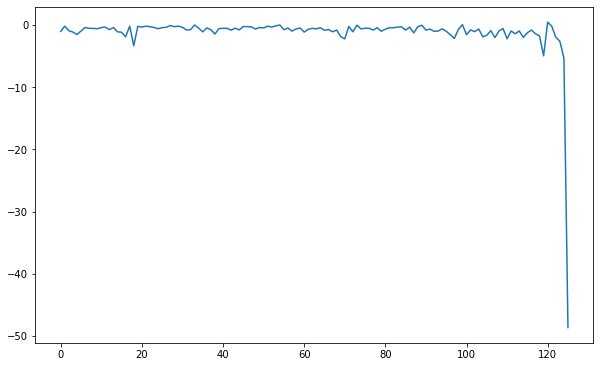

In [195]:
plt.plot(gamma)
# plt.plot(gamma_new)
# plt.ylim([-10,5])

In [86]:
pre = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/"
pp = "first_1600_phi_gxxxg_v2_well126"
cutoff_i = 110
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

gamma_new

array([-1.64272789e+00, -5.13312291e-01, -1.42903864e+00, -1.35629415e+00,
       -2.47988246e+00, -1.45128532e+00, -7.31813092e-01, -8.61589765e-01,
       -7.35530894e-01, -9.65026212e-01, -8.02472850e-01, -6.95027669e-01,
       -1.12196634e+00, -7.58927786e-01, -1.52074438e+00, -1.03672108e+00,
       -2.46690604e+00, -4.08015789e-01, -4.30768495e+00, -5.15158469e-01,
       -6.41526517e-01, -5.44441053e-01, -6.07242836e-01, -7.53815666e-01,
       -9.94230970e-01, -9.34746775e-01, -9.22776285e-01, -2.43693115e-01,
       -6.08563894e-01, -4.96006031e-01, -8.05849779e-01, -3.35236419e-02,
       -1.68264382e-01, -9.89435554e-02, -6.02806211e-03, -1.70171404e+00,
       -8.21577281e-01, -9.79768699e-01, -1.65094642e+00, -9.06236097e-01,
       -8.58573083e-01, -8.52276253e-01, -1.18599221e+00, -8.66606138e-01,
       -1.09163386e+00, -5.27260475e-01, -5.72177264e-01, -6.80370400e-01,
       -1.06390715e+00, -7.04012859e-01, -7.74777443e-01, -4.62114230e-01,
       -8.64833796e-01, -

In [92]:
A_prime.dot(gamma)

-132.3232141061

In [93]:
A_prime.dot(gamma_last)

-140.43692799259998

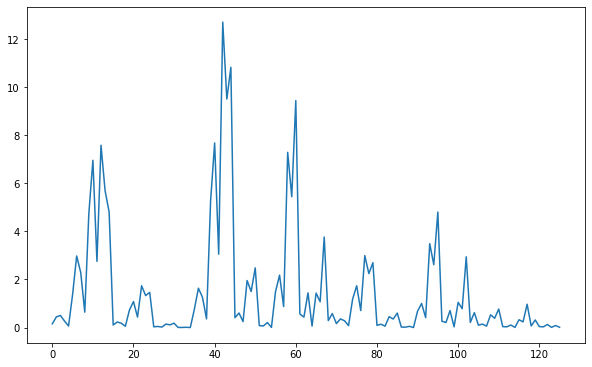

In [95]:
plt.plot(A_prime)

In [87]:
np.argmax(gamma_new- compare)

125

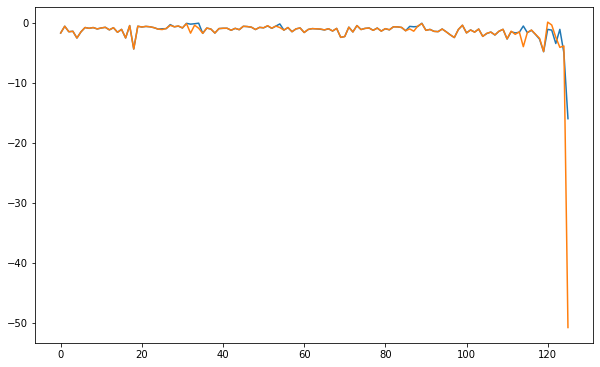

In [88]:
plt.plot(gamma_new)
plt.plot(compare)

In [70]:
inverse_six_letter_code_combinations_map[114]

'202000'

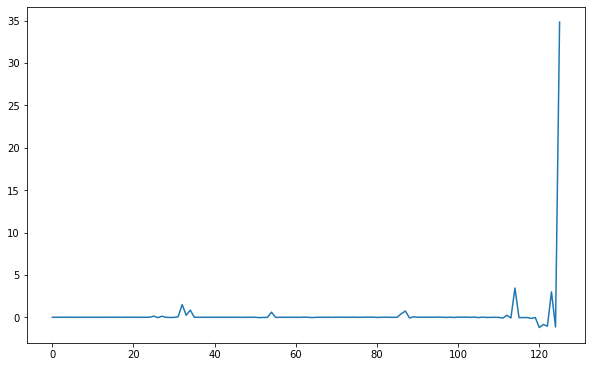

In [89]:
plt.plot(gamma_new- compare)
# plt.plot()

In [65]:
pre = "/Users/weilu/Research/server/jul_week1_2020/gxxxg_shuffle_optimization/optimization_test_2/gammas/"
pp = "first_1600_phi_gxxxg_v2_well126"
cutoff_i = 126
A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
# c = np.dot(A_prime, original_gamma_deybe)
c = -200
# if args.constant == 0.0:
#     c = np.dot(A_prime, original_gamma)
# else:
#     c = args.constant
# print("A' gamma = constant:", c)
# do(f"echo 'c {c}\n' >> constant_log")
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)
compare = gamma_new

In [82]:
frequency_table["code"] = frequency_table["index"].apply(lambda x: six_letter_code_combinations_map[x])

In [85]:
frequency_table

,index,code,frequency
0,010201,42,35804
1,020200,60,35698
2,010300,44,31723
3,000301,12,19886
4,000400,14,18300
...,...,...,...
118,112000,99,22
119,002020,27,20
120,003010,32,8
121,003001,31,5


In [97]:
frequency_table.query("index=='000004'")

,index,code,frequency
78,000004,0,583


In [84]:
frequency_table.query("code==114")

,index,code,frequency
116,202000,114,28


In [41]:
inverse_six_letter_code_combinations_map[60]

'020200'

In [80]:
frequency_table = data_selected["code"].value_counts().reset_index()
frequency_table["frequency"] = frequency_table["code"]

In [27]:
data_selected["code"].value_counts()

010201    35804
020200    35698
010300    31723
000301    19886
000400    18300
          ...  
112000       22
002020       20
003010        8
003001        5
013000        4
Name: code, Length: 123, dtype: int64

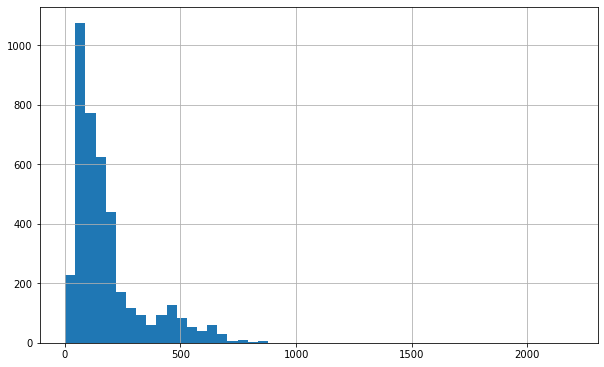

In [21]:
data["Protein"].value_counts().hist(bins=50)

In [ ]:
def get_interaction_index_from_four_residues_v2(res1_1, res1_2, res2_1, res2_2):
    interaction_index, code = calculate_six_letter_index([three_to_one(res1_1), three_to_one(res1_2), three_to_one(res2_1), three_to_one(res2_2)])
    return interaction_index

def phi_gxxxg_v2_well(res_list, neighbor_list, parameter_list):
    # focus on anti parallel first. (means i to j+4, i+4 to j)
    min_seq_sep = 10
    r_min = 2.0
    r_max = 6.5
    kappa = 5
    n_parameters = 126
    info_list = []
    get_distance_between_two_residues = get_interaction_distance_com
    phi_gxxxg_well = np.zeros(n_parameters)
    for res1globalindex, res1 in enumerate(res_list):
        res1index = get_local_index(res1)
        res1chain = get_chain(res1)
        for res2 in get_neighbors_within_radius(neighbor_list, res1, r_max+2.0):
            res2index = get_local_index(res2)
            res2chain = get_chain(res2)
            res2globalindex = get_global_index(res_list, res2)

            if res2globalindex - res1globalindex >= min_seq_sep or (res1chain != res2chain and res2globalindex > res1globalindex):
                res1type = get_res_type(res_list, res1)
                res2type = get_res_type(res_list, res2)
                rij = get_distance_between_two_residues(res1, res2)
                res1_2_globalindex = res1globalindex+4
                res1_2 = get_res_by_globalindex(res_list, res1_2_globalindex, res1chain)
                for shift_to_res2_2 in [-4, 4]:
                    # consider parallel, and anti-parallel.
                    res2_2_globalindex = res2globalindex + shift_to_res2_2
                    res2_2 = get_res_by_globalindex(res_list, res2_2_globalindex, res2chain)
                    if res1_2 == -1 or res2_2 == -1:
                        continue
                    rij_2 = get_distance_between_two_residues(res1_2, res2_2)
                    if rij_2 > (r_max+2):
                        continue
                    # interaction_index = get_interaction_index_from_four_residues(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    interaction_index = get_interaction_index_from_four_residues_v2(res1.resname, res1_2.resname, res2.resname, res2_2.resname)
                    phi_ = interaction_well(rij, r_min, r_max, kappa) * interaction_well(rij_2, r_min, r_max, kappa)
                    phi_gxxxg_well[interaction_index] += phi_
                # print(info_)
    phis_to_return = []
    for i in range(n_parameters):
        phis_to_return.append(round(phi_gxxxg_well[i],4))
    return phis_to_return

In [15]:
data

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,Res1,Chain1,Res2,Chain2,rij,rij_2,Protein,Direction
0,11,5,MET,52,LEU,9,ILE,48,PHE,44,A,95,A,6.376584,6.274799,3cap,anti
1,13,5,MET,48,PHE,9,ILE,44,VAL,44,A,91,A,5.375535,5.421462,3cap,anti
2,22,8,LEU,48,PHE,12,GLY,44,VAL,47,A,91,A,4.412404,5.269533,3cap,anti
3,24,9,ILE,49,THR,13,PHE,45,PHE,48,A,92,A,5.495952,5.990161,3cap,anti
4,30,12,GLY,44,VAL,16,ASN,40,ASP,51,A,87,A,5.269533,3.804606,3cap,anti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746515,2277753,555,LEU,748,THR,559,PHE,752,ALA,317,B,681,B,5.458916,5.365570,6c96,parallel
746516,2277757,558,VAL,748,THR,562,PHE,752,ALA,320,B,681,B,4.720123,4.583742,6c96,parallel
746517,2277758,558,VAL,752,ALA,562,PHE,756,GLU,320,B,685,B,5.797050,5.380803,6c96,parallel
746518,2277779,601,TYR,639,ALA,605,LEU,643,LEU,480,B,519,B,5.407334,5.468802,6c96,parallel


## check for each residue type of res1_1, the distribution of residue type of res1_2.

In [3]:
# (G)(CAST)(P)(IMLV)(NHQEDRK)(FYW)
six_letter_code_letters = {
    'I':3,
    'M':3,
    'L':3,
    'V':3,
    'F':5,
    'Y':5,
    'W':5,
    'G':0,
    'P':2,
    'C':1,
    'A':1,
    'S':1,
    'T':1,
    'N':4,
    'H':4,
    'Q':4,
    'E':4,
    'D':4,
    'R':4,
    'K':4
}


In [4]:
data["Res1_2_index"] = data["Res1_2"].apply(lambda x: six_letter_code_letters[three_to_one(x)])
data["Res2_2_index"] = data["Res2_2"].apply(lambda x: six_letter_code_letters[three_to_one(x)])

In [30]:
data.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index()

,Res1_1,Res2_1,Protein
0,ALA,ALA,5706
1,ALA,ARG,355
2,ALA,ASN,689
3,ALA,ASP,365
4,ALA,CYS,1028
...,...,...,...
395,VAL,SER,2554
396,VAL,THR,2344
397,VAL,TRP,854
398,VAL,TYR,1342


In [31]:
data.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index().sort_values("Protein")

,Res1_1,Res2_1,Protein
161,HIS,ARG,9
228,LYS,HIS,9
66,ASP,GLU,10
88,CYS,HIS,14
164,HIS,CYS,17
...,...,...,...
219,LEU,VAL,7005
200,LEU,ALA,7100
390,VAL,LEU,7714
10,ALA,LEU,10072


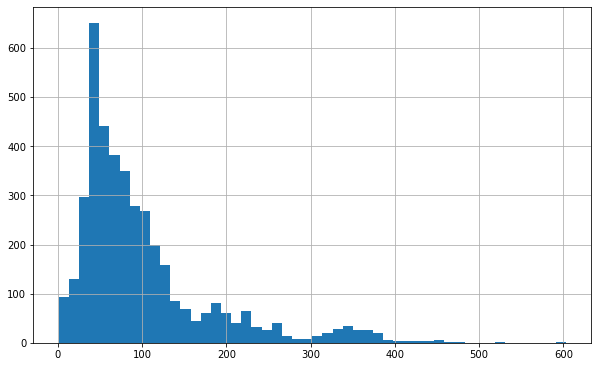

In [16]:
data["Protein"].value_counts().hist(bins=50)

In [33]:
similar_size_protein_list = data["Protein"].value_counts().reset_index().query("Protein > 50 and Protein < 150")["index"].to_list()

In [34]:
data_selected = data.query("Protein in @similar_size_protein_list").reset_index(drop=True)

In [35]:
data_selected.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index()

,Res1_1,Res2_1,Protein
0,ALA,ALA,1921
1,ALA,ARG,144
2,ALA,ASN,356
3,ALA,ASP,117
4,ALA,CYS,336
...,...,...,...
395,VAL,SER,766
396,VAL,THR,1167
397,VAL,TRP,389
398,VAL,TYR,677


In [36]:
data_selected.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index().sort_values("Protein")

,Res1_1,Res2_1,Protein
66,ASP,GLU,2
161,HIS,ARG,2
228,LYS,HIS,3
165,HIS,GLN,5
64,ASP,CYS,6
...,...,...,...
213,LEU,PHE,3302
390,VAL,LEU,3407
219,LEU,VAL,3601
10,ALA,LEU,5445


In [38]:
data_selected.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index().query("Res1_1=='GLU'")

,Res1_1,Res2_1,Protein
120,GLU,ALA,107
121,GLU,ARG,106
122,GLU,ASN,302
123,GLU,ASP,20
124,GLU,CYS,23
125,GLU,GLN,61
126,GLU,GLU,93
127,GLU,GLY,53
128,GLU,HIS,54
129,GLU,ILE,169


In [7]:
data.query("Res1_1=='LEU' and Res2_1=='LEU'")\
    .groupby(["Res1_1", "Res1_2", "Res2_1", "Res2_2"])["Protein"].count()\
    .reset_index().sort_values("Protein")

,Res1_1,Res1_2,Res2_1,Res2_2,Protein
268,LEU,TYR,LEU,MET,1
202,LEU,PRO,LEU,GLU,1
46,LEU,ASP,LEU,GLN,1
48,LEU,ASP,LEU,HIS,1
196,LEU,PHE,LEU,TYR,1
...,...,...,...,...,...
239,LEU,THR,LEU,PHE,409
16,LEU,ALA,LEU,VAL,424
132,LEU,ILE,LEU,PHE,485
49,LEU,ASP,LEU,ILE,503


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12bc62b70>]],
      dtype=object)

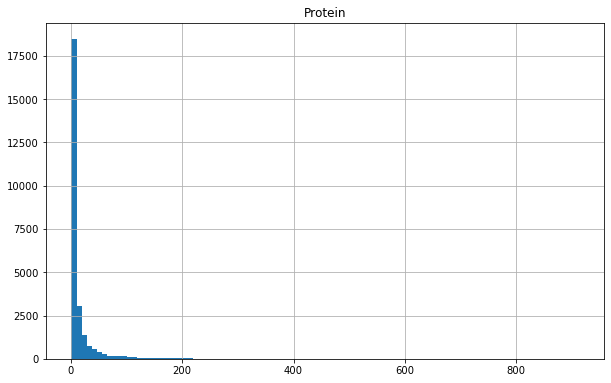

In [76]:
data.groupby(["Res1_1", "Res1_2", "Res2_1", "Res2_2"])["Protein"].count().reset_index().hist("Protein", bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129a23eb8>]],
      dtype=object)

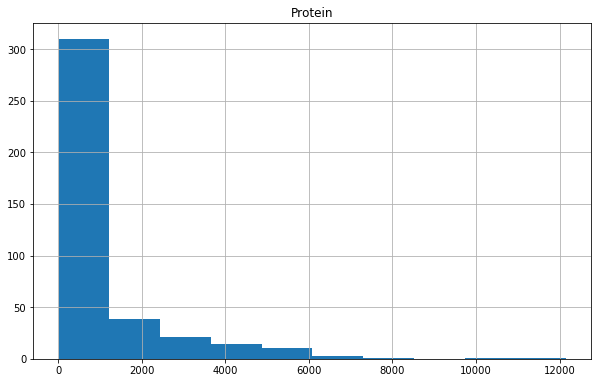

In [66]:
data.groupby(["Res1_1", "Res2_1"])["Protein"].count().reset_index().sort_values("Protein").hist("Protein")

In [56]:
data

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,rij,rij_2,Protein
0,5,9,ILE,139,TYR,13,TRP,135,PRO,4.745577,5.649241,5klv
1,44,18,LEU,52,CYS,22,CYS,48,MET,4.983217,6.323903,5klv
2,53,19,LEU,53,LEU,23,LEU,49,PHE,5.325266,5.948275,5klv
3,72,22,CYS,49,PHE,26,GLN,45,GLY,4.780600,4.214675,5klv
4,77,23,LEU,122,MET,27,ILE,118,PRO,5.224630,6.272329,5klv
...,...,...,...,...,...,...,...,...,...,...,...,...
409603,4405746,238,LEU,252,LEU,242,TYR,248,TYR,5.923637,6.061386,2jk5
409604,4405756,240,GLY,255,SER,244,ALA,251,ALA,5.320137,5.053491,2jk5
409605,4405758,240,GLY,279,VAL,244,ALA,275,VAL,5.541042,4.824887,2jk5
409606,4405765,241,SER,255,SER,245,VAL,251,ALA,4.019016,5.023278,2jk5


In [58]:
400*6*6

14400

In [52]:
400**2

160000

In [51]:
data_cutoff.a

,index,Index1_1,Res1_1,Index2_1,Res2_1,Index1_2,Res1_2,Index2_2,Res2_2,rij,rij_2,Protein
0,5,9,ILE,139,TYR,13,TRP,135,PRO,4.745577,5.649241,5klv
1,44,18,LEU,52,CYS,22,CYS,48,MET,4.983217,6.323903,5klv
2,53,19,LEU,53,LEU,23,LEU,49,PHE,5.325266,5.948275,5klv
3,72,22,CYS,49,PHE,26,GLN,45,GLY,4.780600,4.214675,5klv
4,77,23,LEU,122,MET,27,ILE,118,PRO,5.224630,6.272329,5klv
...,...,...,...,...,...,...,...,...,...,...,...,...
409603,4405746,238,LEU,252,LEU,242,TYR,248,TYR,5.923637,6.061386,2jk5
409604,4405756,240,GLY,255,SER,244,ALA,251,ALA,5.320137,5.053491,2jk5
409605,4405758,240,GLY,279,VAL,244,ALA,275,VAL,5.541042,4.824887,2jk5
409606,4405765,241,SER,255,SER,245,VAL,251,ALA,4.019016,5.023278,2jk5


In [2]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/gammas/protein_list_jul02_half_phi_gxxxg_well701_A"
a = np.loadtxt(fileLocation)

### using the most common 700.
#### results is not consistent. and a small bug exists( chain2 instead chain1)

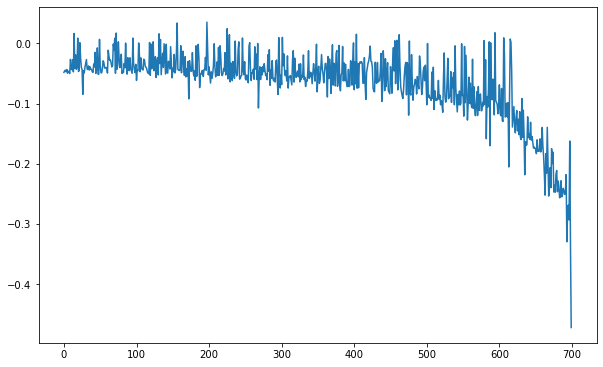

In [9]:
plt.plot(a[:-1])

In [26]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/gammas/protein_list_jul02_last_2000_phi_gxxxg_well701_A"
a = np.loadtxt(fileLocation)

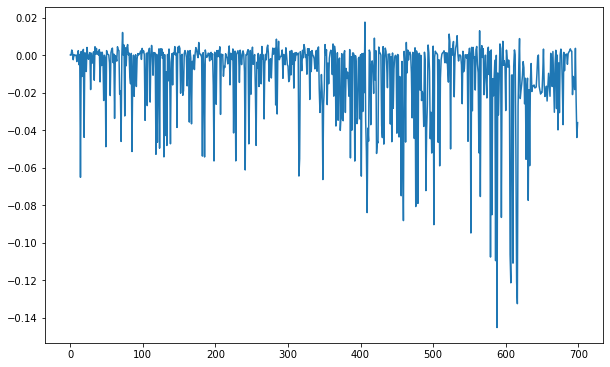

In [27]:
plt.plot(a[:-1])

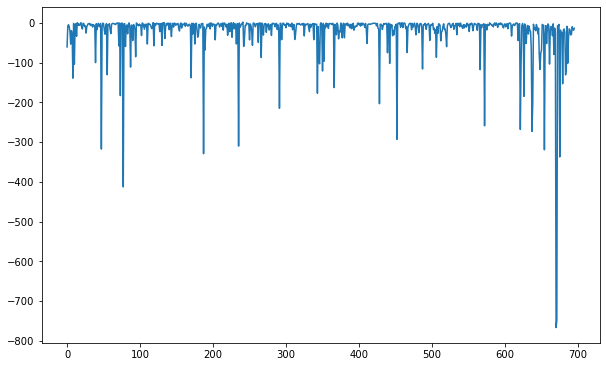

In [39]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/backup_gammas_first_2000/protein_list_jul02_half_phi_gxxxg_well701_gamma"
first2000_gamma = np.loadtxt(fileLocation)
plt.plot(first2000_gamma[:-5])

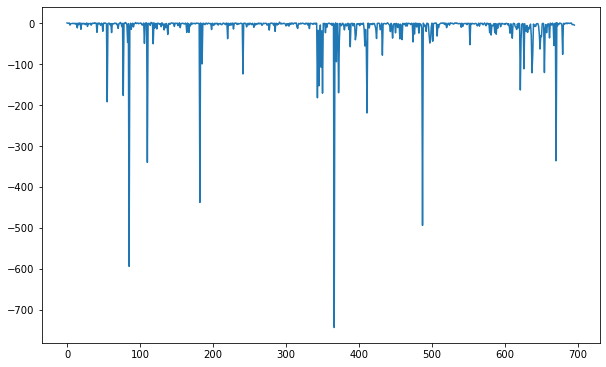

In [40]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/gammas/protein_list_jul02_last_2000_phi_gxxxg_well701_gamma"
last2000_gamma = np.loadtxt(fileLocation)
plt.plot(last2000_gamma[:-5])

(-100, 0)

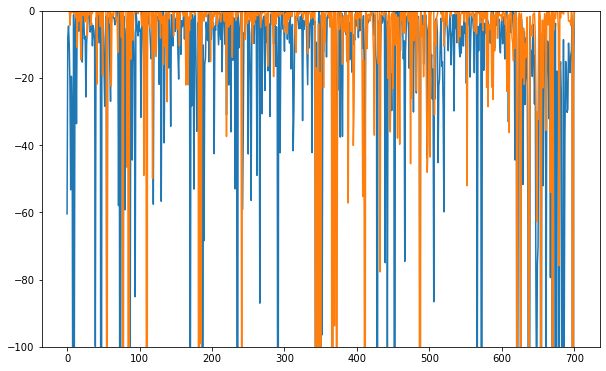

In [44]:
plt.plot(first2000_gamma)
plt.plot(last2000_gamma)
# plt.yscale("log")
plt.ylim([-100,0])

In [13]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/gammas/protein_list_jul02_half_phi_gxxxg_well701_B"

In [14]:
b = np.loadtxt(fileLocation)

In [15]:
b.shape

(701, 701)

In [19]:
b.max()

28.42026

In [20]:
b[:-1,:-1].max()

0.12681

In [22]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/cath_dataset_shuffle_optimization/optimization_iter0/gammas/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_B"
b = np.loadtxt(fileLocation)

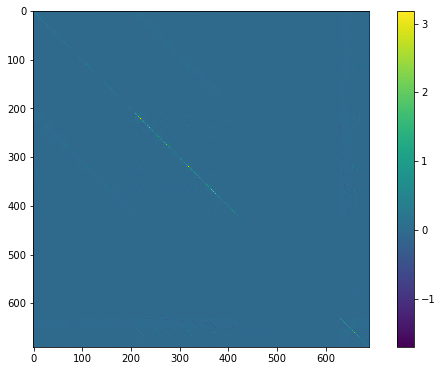

In [25]:
plt.imshow(b)
plt.colorbar()



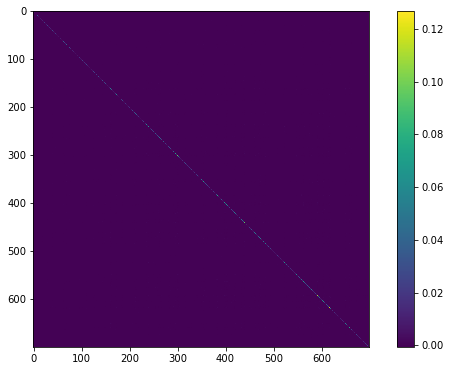

In [21]:
plt.imshow(b[:-1,:-1])
plt.colorbar()


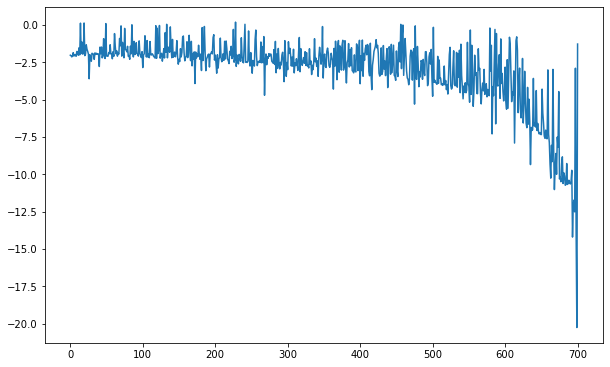

In [47]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/saved_gammas/first2000_cutoff200_impose_Aprime_constraint"
first2000_gamma = np.loadtxt(fileLocation)
plt.plot(first2000_gamma)

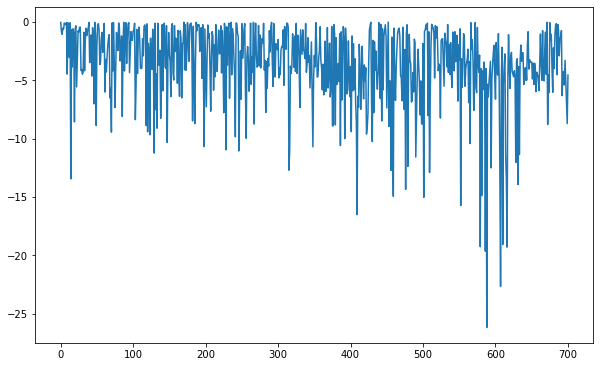

In [48]:
fileLocation = "/Users/weilu/Research/server/jun_week4_2020/gxxxg_shuffle_optimization/optimization_test_1/saved_gammas/second2000_cutoff200_impose_Aprime_constraint"
last2000_gamma = np.loadtxt(fileLocation)
plt.plot(last2000_gamma)

In [ ]:
from pyCodeLib import *
import warnings

cutoff_list = list(np.arange(100, total_phis, 100))
if total_phis == 690:
    cutoff_list += [630, 650, 670, 690]
print("cutoff_list: ", cutoff_list)
do("mkdir -p saved_gammas")
for cutoff_i in cutoff_list:
    A, A_prime, filtered_gamma, filtered_B_inv = get_filtered_gamma(pre, cutoff_i, pp)
    # c = np.dot(A_prime, original_gamma_deybe)
    if args.constant == 0.0:
        c = np.dot(A_prime, original_gamma)
    else:
        c = args.constant
    print("A' gamma = constant:", c)
    do(f"echo 'c {c}\n' >> constant_log")
    B_inv = filtered_B_inv
    lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
    gamma_new = B_inv.dot(A-A_prime*lambda_2)
    # impose A'gamma
    # save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"

    np.savetxt(f"{save_gamma_pre}/{trial_name}_cutoff{cutoff_i}_impose_Aprime_constraint", gamma_new)